## Zadanie 1
Proszę pobrać plik customers_mall.csv, zawierający informacje o klientach pewnego centrum handlowego. Pierwsza kolumna przedstawia ich zarobki (w tysiącach), w drugiej zaś znajduje się punktowa ocena wydatków (od 0 do 100) każdego z klientów.  Proszę dokonać klasteryzacji zbioru z użyciem algorytmu k-means. Uzyskane wyniki należy zwizualizować, ocenić i opisać. Wskazane jest zarekomendowanie odpowiedniej ilości klastrów.

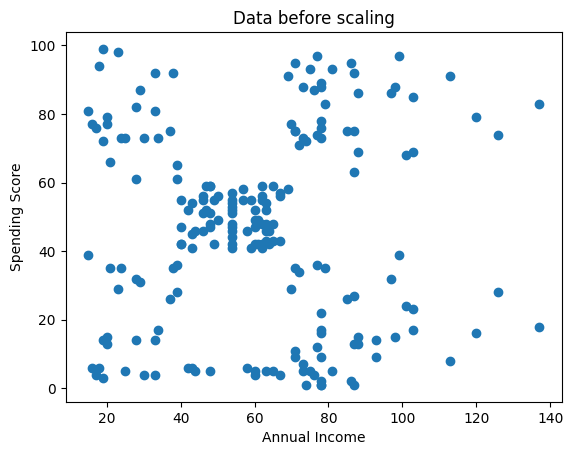

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# load data
data = pd.read_csv("data/customers_mall.csv", sep=";")


def plot_mall_data(data, title):
    plt.scatter(data[data.columns[0]], data[data.columns[1]])
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.title(title)


plot_mall_data(data, "Data before scaling")

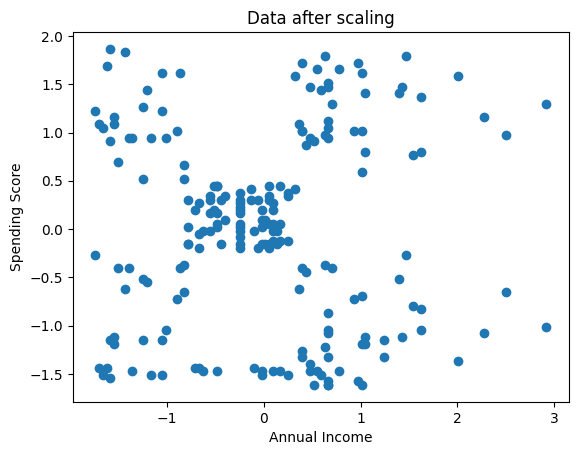

In [81]:
from sklearn.preprocessing import StandardScaler

# perform skaling
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

plot_mall_data(scaled_data, "Data after scaling")

In [82]:
from sklearn.cluster import KMeans

k_clusters = range(2, 11)

inertias = []
centres = []
labels = []
silhouettes = []
for k in k_clusters:
    model = KMeans(n_clusters=k, random_state=2137)
    model.fit(scaled_data)
    inertias.append(model.inertia_)
    centres.append(model.cluster_centers_)
    labels.append(model.labels_)

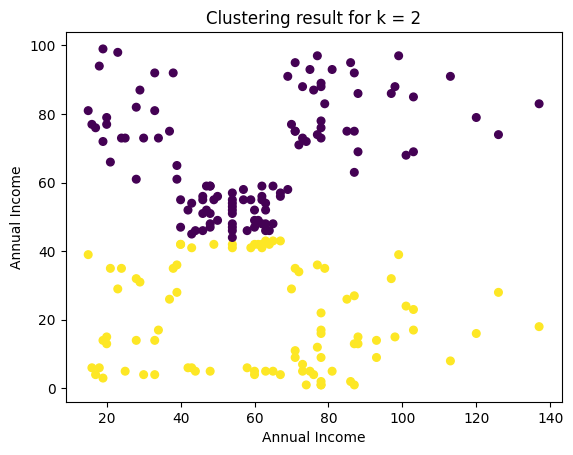

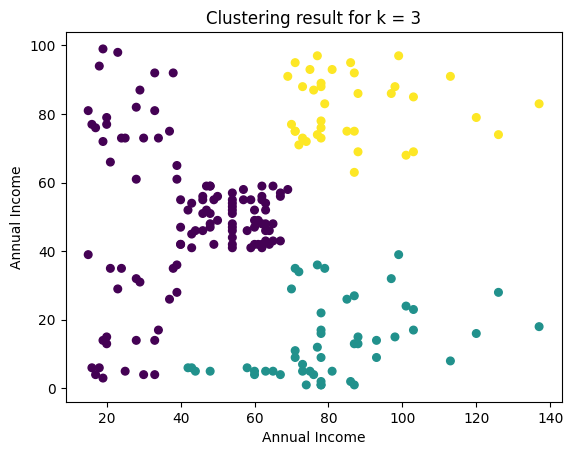

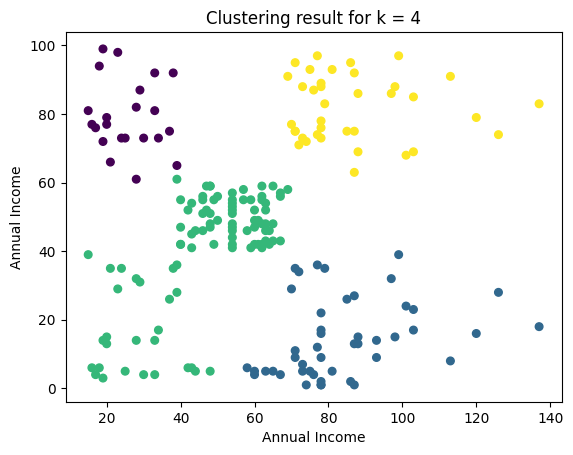

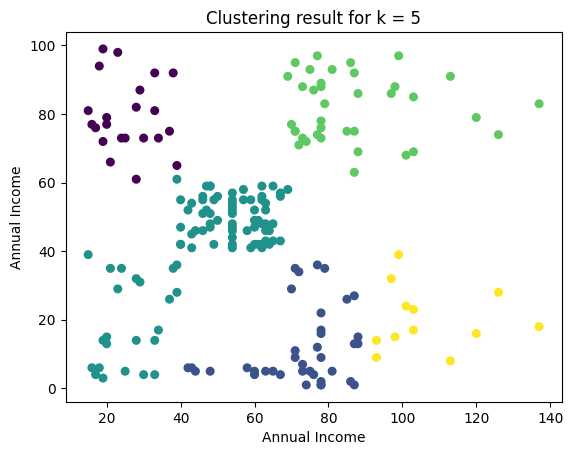

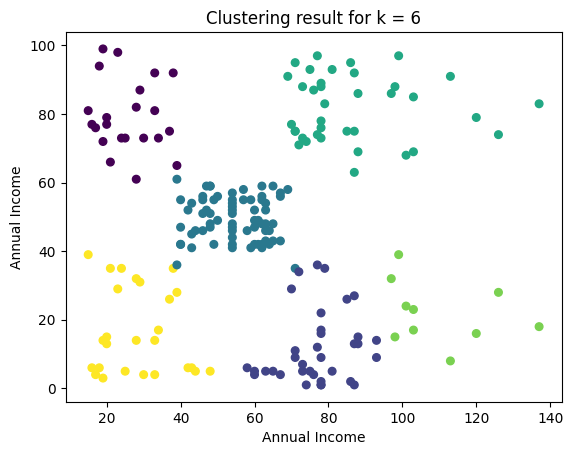

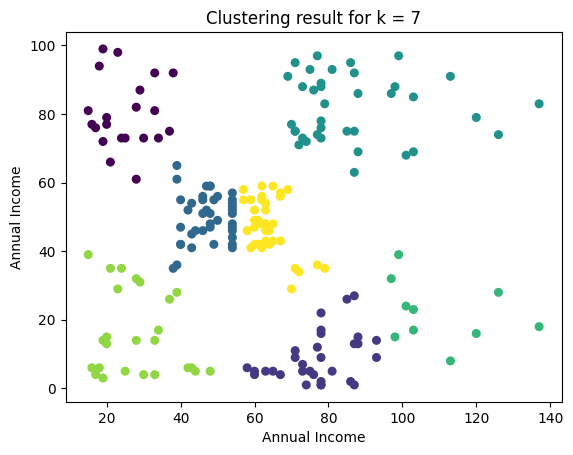

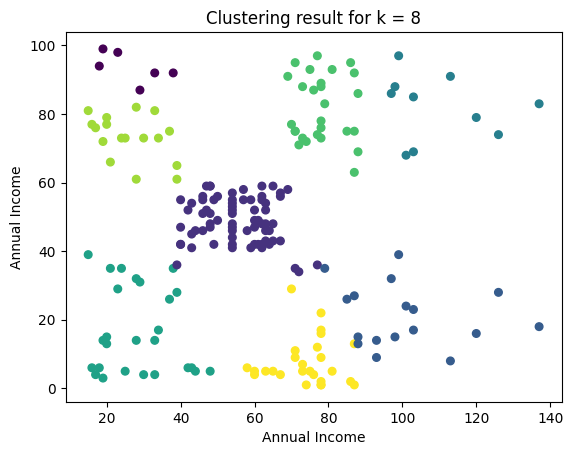

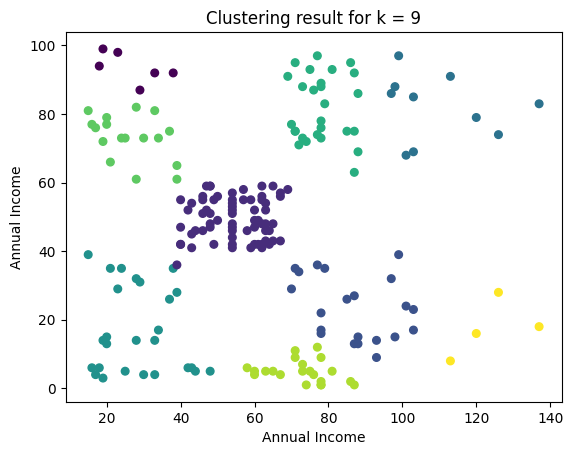

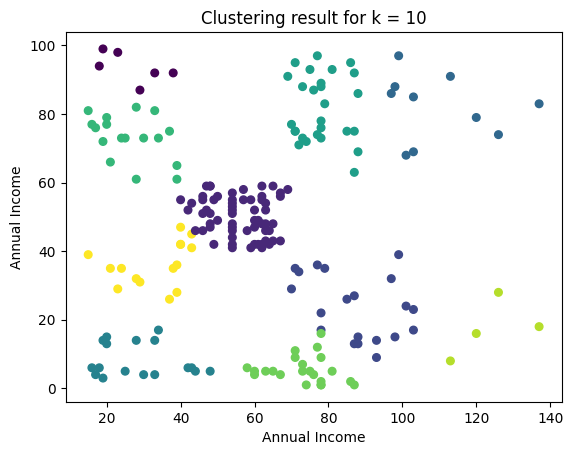

In [83]:
# plot

for idx, k in enumerate(k_clusters):
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels[idx], s=30)
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[0])
    plt.title(f"Clustering result for k = {k}")
    plt.show()

In [84]:
# stats for each of the k-means clustering
from prettytable import PrettyTable
from sklearn import metrics

table = PrettyTable()
table.field_names = ["k", "Silhouette score", "Davies-Bouldin", "Calinski-Harabasz"]

for idx, k in enumerate(k_clusters):
    ss = metrics.silhouette_score(scaled_data, labels[idx])
    db = metrics.davies_bouldin_score(scaled_data, labels[idx])
    ch = metrics.calinski_harabasz_score(scaled_data, labels[idx])

    table.add_row([k, ss, db, ch])

print(table)

+----+---------------------+--------------------+--------------------+
| k  |   Silhouette score  |   Davies-Bouldin   | Calinski-Harabasz  |
+----+---------------------+--------------------+--------------------+
| 2  | 0.32724431014969274 | 1.2320219459143504 | 105.91909519493385 |
| 3  |  0.4493630225705114 | 0.7748484819999607 | 150.94434365321035 |
| 4  |  0.4738240443020257 | 0.7466760517702702 | 166.52842189961825 |
| 5  | 0.44467952284799545 | 0.762159025971177  | 150.18807037418767 |
| 6  |  0.5314351688630429 | 0.6302809686194478 | 244.44627518777952 |
| 7  |  0.4551979896976941 | 0.6960375573945953 | 235.84487930633955 |
| 8  | 0.49028891236453875 | 0.7633184073814967 | 230.8473535308666  |
| 9  |  0.4863896945545487 | 0.7661946148257146 | 230.60866803055123 |
| 10 |  0.4628850987133684 | 0.8021403179402233 | 240.38843483003316 |
+----+---------------------+--------------------+--------------------+


## Zadanie 2
W pliku planets.csv mają państwo zbiór 778 spośród ponad 5000 znanych egzoplanet (planet pozasłonecznych) pozyskany z bazy danych NASA (https://exoplanetarchive.ipac.caltech.edu/index.html). Proszę dokonać klasteryzacji tego zbioru kilkoma sposobami, ocenić wyniki za pomocą odpowiednich metryk, wybrać dowolny z wyników i jego rezultaty (czym się charakteryzują klastry).

In [85]:
# data preparation
planets = pd.read_csv("data/planets.csv")


def remove_outliers_(df, col):
    mean = df[col].mean()
    std = df[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


colnames = planets.columns[1:]
planets = planets.drop("pl_name", axis=1)

for colname in colnames:
    planets = remove_outliers_(planets, colname)

scaled_planets = StandardScaler().fit_transform(planets)
# from sklearn.preprocessing import MinMaxScaler
# scaled_planets = MinMaxScaler().fit_transform(planets)

In [86]:
results = {}  # overall results

k_range = range(2, 9)

# k-means
kmeans_results = {}
for k in k_range:
    model = KMeans(n_clusters=k, random_state=420)
    labels = model.fit_predict(scaled_planets)
    sil = metrics.silhouette_score(scaled_planets, labels)
    db = metrics.davies_bouldin_score(scaled_planets, labels)
    ch = metrics.calinski_harabasz_score(scaled_planets, labels)
    kmeans_results[k] = {
        "labels": labels,
        "silhouette": sil,
        "davies_bouldin": db,
        "calinski_harabasz": ch,
    }

results["KMeans"] = kmeans_results

In [87]:
from sklearn.cluster import AgglomerativeClustering

# agglomerative
agglo_ward = {}
agglo_single = {}
for linkage in ["ward", "single"]:
    for k in k_range:
        agglo = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        labels_agglo = agglo.fit_predict(scaled_planets)
        sil_agglo = metrics.silhouette_score(scaled_planets, labels_agglo)
        db_agglo = metrics.davies_bouldin_score(scaled_planets, labels_agglo)
        ch_agglo = metrics.calinski_harabasz_score(scaled_planets, labels_agglo)

        if linkage == "ward":
            agglo_ward[k] = {
                "labels": labels_agglo,
                "silhouette": sil_agglo,
                "davies_bouldin": db_agglo,
                "calinski_harabasz": ch_agglo,
            }
        else:
            agglo_single[k] = {
                "labels": labels_agglo,
                "silhouette": sil_agglo,
                "davies_bouldin": db_agglo,
                "calinski_harabasz": ch_agglo,
            }

results["AggloWard"] = agglo_ward
results["AggloSingle"] = agglo_single

In [88]:
from sklearn.cluster import DBSCAN
import numpy as np

dbscan = DBSCAN(eps=1, min_samples=20)
labels_dbscan = dbscan.fit_predict(scaled_planets)
# dbscan assigns -1 as the label for noise
if len(set(labels_dbscan)) > 1:
    sil_dbscan = metrics.silhouette_score(scaled_planets, labels_dbscan)
    db_dbscan = metrics.davies_bouldin_score(scaled_planets, labels_dbscan)
    ch_dbscan = metrics.calinski_harabasz_score(scaled_planets, labels_dbscan)
else:
    sil_dbscan, db_dbscan, ch_dbscan = np.nan, np.nan, np.nan

results["DBSCAN"] = {
    "labels": labels_dbscan,
    "silhouette": sil_dbscan,
    "davies_bouldin": db_dbscan,
    "calinski_harabasz": ch_dbscan,
}

+---------------------+-------------------+-------------------+
|   Silhouette score  |   Davies-Bouldin  | Calinski-Harabasz |
+---------------------+-------------------+-------------------+
| 0.05385193786484954 | 2.398683616253354 | 74.06426600886108 |
+---------------------+-------------------+-------------------+
No. of clusters: 2, noise ratio: 0.55


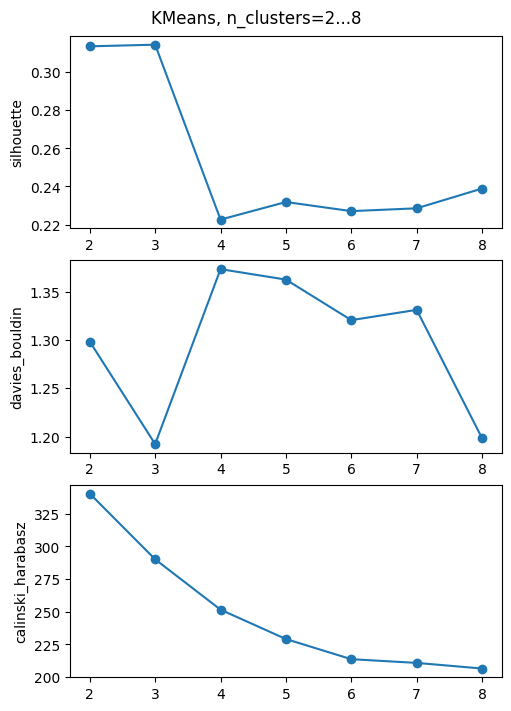

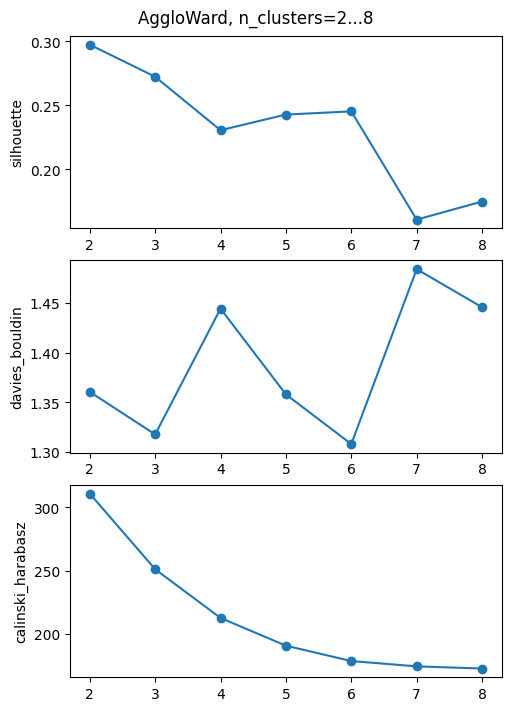

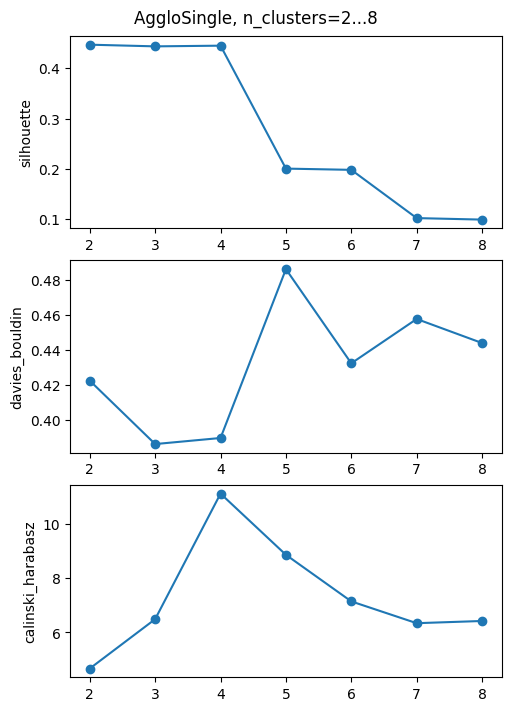

In [89]:
scores = ["silhouette", "davies_bouldin", "calinski_harabasz"]

for method, method_res in results.items():
    if method == "DBSCAN":
        table = PrettyTable()
        table.field_names = [
            "Silhouette score",
            "Davies-Bouldin",
            "Calinski-Harabasz",
        ]
        table.add_row([results[method][score] for score in scores])
        print(table)
        unique_labels = set(labels_dbscan)
        n_noise = (labels_dbscan == -1).sum()
        n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
        print(
            f"No. of clusters: {n_clusters}, noise ratio: {(n_noise / labels_dbscan.shape[0]):.2}"
        )
        continue

    fig, ax = plt.subplots(3, 1, layout="constrained", figsize=(5, 7))
    fig.suptitle(f"{method}, n_clusters={k_range.start}...{k_range.stop - 1}")

    for idx, score in enumerate(scores):
        y = [method_res[k][score] for k in k_range]
        ax[idx].plot(k_range, y, marker="o")
        ax[idx].set_ylabel(score)

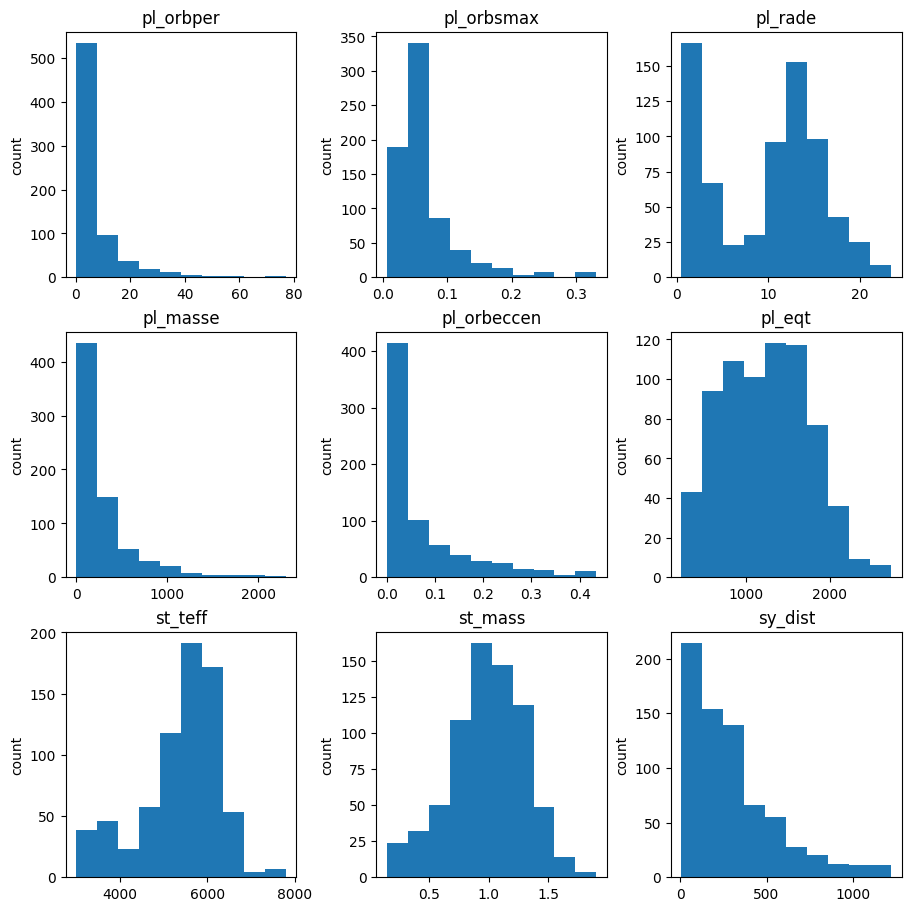

In [90]:
ax = planets.hist(figsize=(9, 9), grid=False)
fig = ax.flatten()[0].get_figure()
fig.set_constrained_layout(True)

for row in ax:
    for axis in row:
        axis.set_ylabel("count")

plt.show()

## Zadanie 3

Z użyciem algorytmu fuzzy clustering proszę zaproponować model dla podanego powyżej zestawu danych. Do uczenia należy wybrać wyłącznie połowę jego kolumn.

In [91]:
features = ["pl_rade", "pl_eqt", "st_teff", "pl_orbper", "pl_masse"]
# X = scaled_planets[features].values

X = planets[features].values
X_scaled = StandardScaler().fit_transform(X)

In [92]:
import skfuzzy as fuzz

c = 2
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_scaled.T, c=c, m=2, error=1e-5, maxiter=1e4
)

In [93]:
labels_fuzzy = np.argmax(u, axis=0)

sil = metrics.silhouette_score(X_scaled, labels_fuzzy)
db = metrics.davies_bouldin_score(X_scaled, labels_fuzzy)
ch = metrics.calinski_harabasz_score(X_scaled, labels_fuzzy)

print(
    f"Fuzzy c-means, c={c}, silhouette={sil:.4}, davies_bouldin={db:.4}, calinski_harabasz={ch:.4}"
)

Fuzzy c-means, c=2, silhouette=0.3878, davies_bouldin=1.059, calinski_harabasz=477.6


In [94]:
def plot_cluster_histograms(
    df, labels, features, method_name="", bins=30, alpha=0.5, cmap_name="tab10"
):
    unique_labels = np.unique(labels[labels >= 0])
    n_feats = len(features)
    fig, axes = plt.subplots(
        1, n_feats, figsize=(5 * n_feats, 4), constrained_layout=True
    )
    if n_feats == 1:
        axes = [axes]
    fig.suptitle(f"{method_name} — {len(unique_labels)} clusters", y=1.05)

    cmap = plt.get_cmap(cmap_name)
    colors = [cmap(i) for i in range(len(unique_labels))]

    for ax, feat in zip(axes, features):
        for c, color in zip(unique_labels, colors):
            ax.hist(
                df[feat][labels == c],
                bins=bins,
                histtype="stepfilled",
                linewidth=1.5,
                edgecolor="black",
                alpha=alpha,
                color=color,
                label=f"cluster {c}",
            )
        ax.set_xlabel(feat)
        ax.set_ylabel("Count")
        ax.legend()

    plt.show()

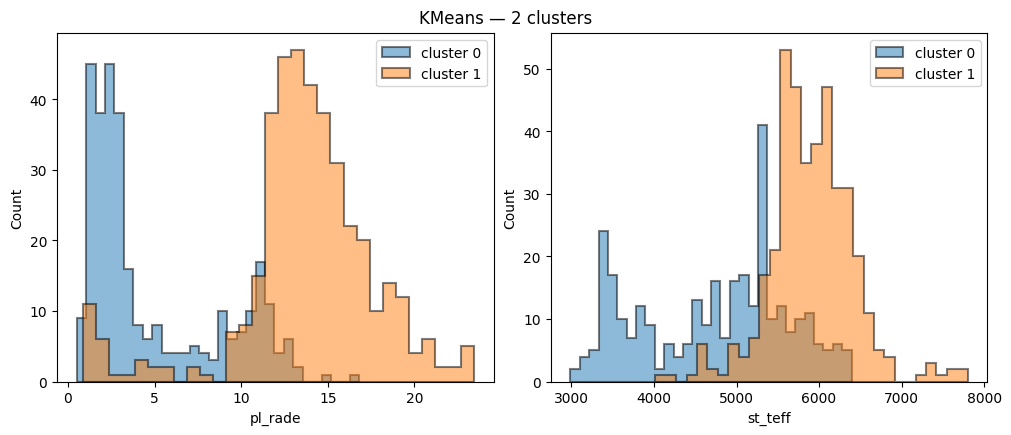

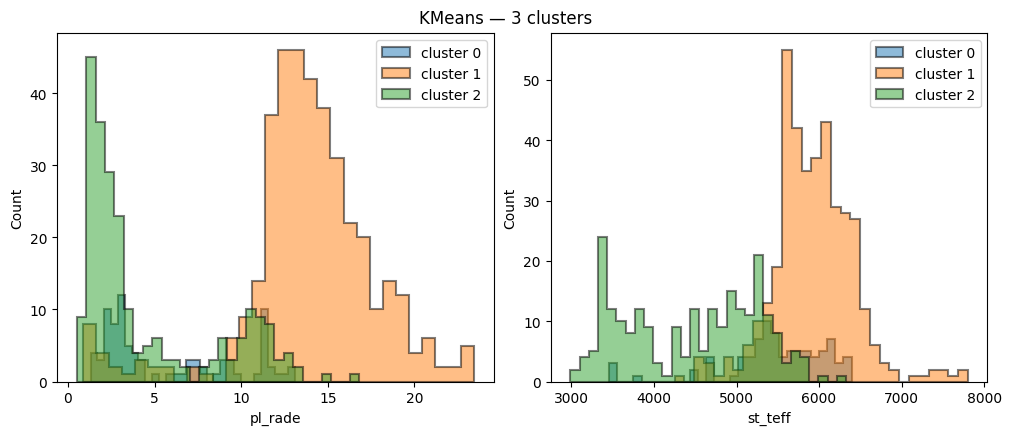

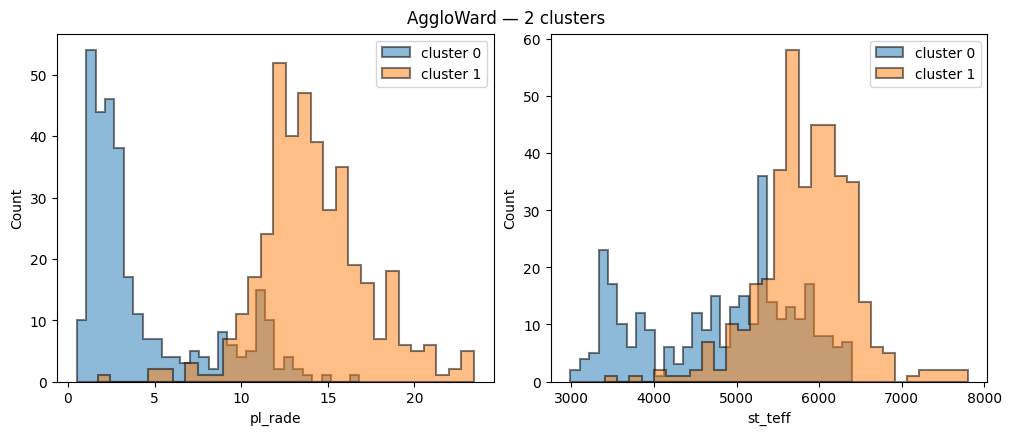

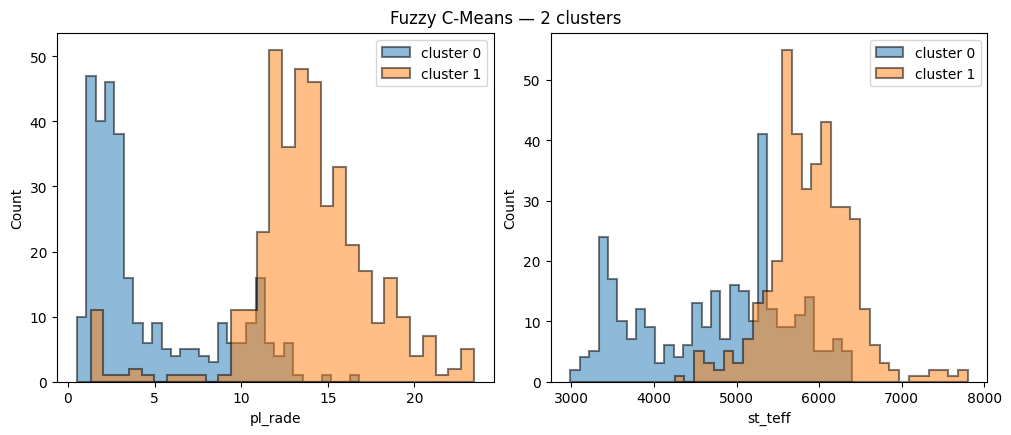

In [ ]:
feats = ["pl_rade", "st_teff"]

plot_cluster_histograms(planets, results["KMeans"][2]["labels"], feats, "KMeans")
plot_cluster_histograms(planets, results["KMeans"][3]["labels"], feats, "KMeans")
plot_cluster_histograms(planets, results["AggloWard"][2]["labels"], feats, "AggloWard")
plot_cluster_histograms(planets, labels_fuzzy, feats, "Fuzzy C-Means")

## Zadanie 4

Dla zbioru danych circle.csv proszę, wykorzystując wszystkie (za wyjątkiem c-means) poznane do tej pory algorytmy klasteryzacyjne, podjąć kilka prób dopasowania jak najlepszego modelu, za każdym razem oceniając rozwiązanie z użyciem dedykowanych do tego metryk. Który z algorytmów najlepiej radzi sobie z takim układem danych i dlaczego? Proszę przedstawić wyniki również w formie odpowiednich wizualizacji.

In [ ]:
df = pd.read_csv("data/circle.csv")

X = df[["x1", "x2"]].values
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
clusterers = {
    "KMeans k=2": KMeans(n_clusters=2, random_state=420),
    "KMeans k=3": KMeans(n_clusters=3, random_state=420),
    "Agglo-ward k=2": AgglomerativeClustering(n_clusters=2, linkage="ward"),
    "Agglo-single k=2": AgglomerativeClustering(n_clusters=2, linkage="single"),
    "DBSCAN eps=0.2": DBSCAN(eps=0.2, min_samples=5),
    "DBSCAN eps=0.1": DBSCAN(eps=0.1, min_samples=5),
}

Method                clusters  noise%   silhouette   DB   CH
KMeans k=2              2       0.0%     0.353    1.189    569.0
KMeans k=3              3       0.0%     0.392    0.834    801.7
Agglo-ward k=2          2       0.0%     0.338    1.217    532.6
Agglo-single k=2        2       0.0%     0.114   170.760      0.0
DBSCAN eps=0.2          2       0.0%     0.114   170.760      0.0
DBSCAN eps=0.1         25       9.7%    -0.012    1.481     76.5


/tmp/ipykernel_83291/1503404831.py:42: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


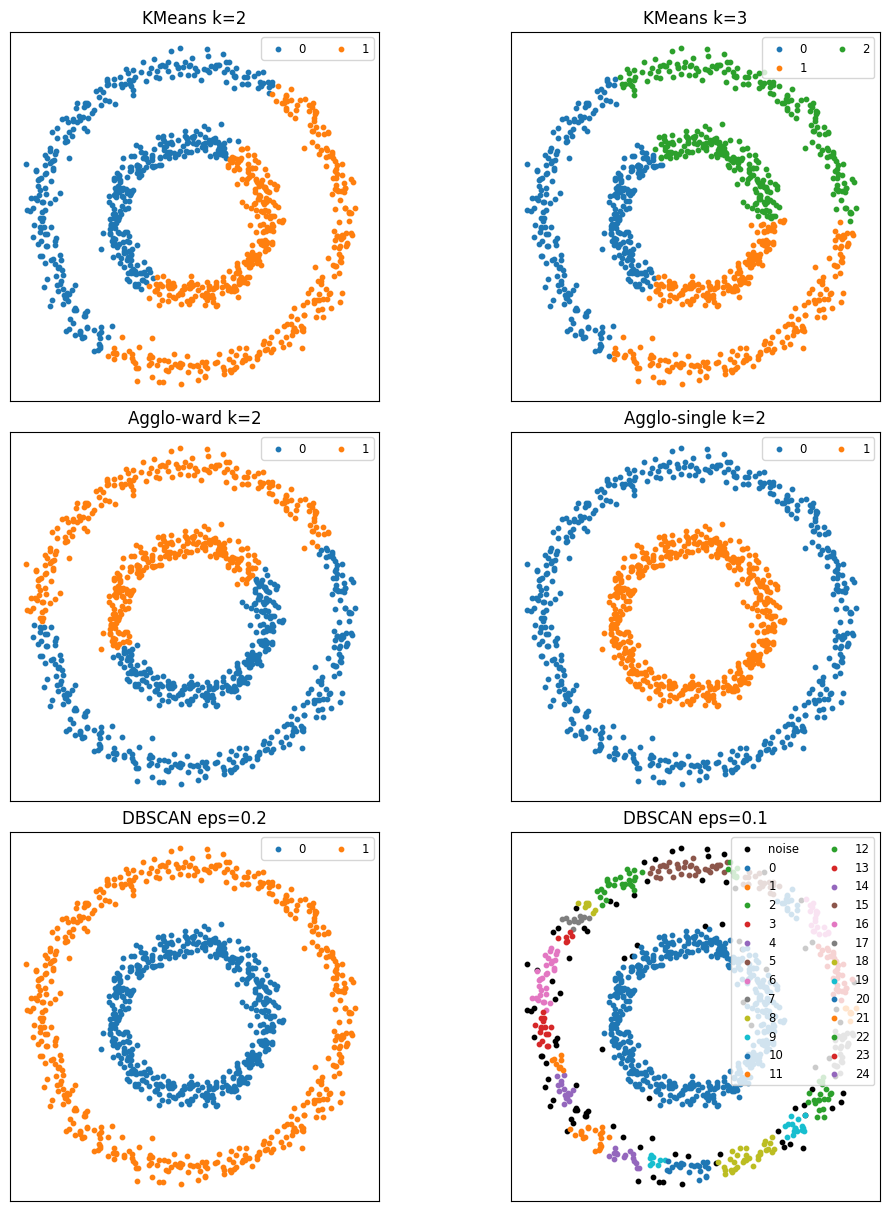

In [101]:
results = {}
for name, algo in clusterers.items():
    labels = algo.fit_predict(X_scaled)

    uniq = set(labels)
    n_clusters = len(uniq) - (1 if -1 in uniq else 0)
    noise_ratio = np.mean(labels == -1)

    if n_clusters >= 2:
        sil = metrics.silhouette_score(X_scaled, labels)
        db = metrics.davies_bouldin_score(X_scaled, labels)
        ch = metrics.calinski_harabasz_score(X_scaled, labels)
    else:
        sil = db = ch = np.nan

    results[name] = {
        "labels": labels,
        "n_clusters": n_clusters,
        "noise_ratio": noise_ratio,
        "silhouette": sil,
        "davies_bouldin": db,
        "calinski_harabasz": ch,
    }

print(f"{'Method':<20}  clusters  noise%   silhouette   DB   CH")
for name, res in results.items():
    print(
        f"{name:<20}   {res['n_clusters']:2d}       {res['noise_ratio']:.1%}    "
        f"{res['silhouette'] or 0:6.3f}   {res['davies_bouldin'] or 0:6.3f}   {res['calinski_harabasz'] or 0:6.1f}"
    )

fig, axes = plt.subplots(3, 2, figsize=(10, 12), constrained_layout=True)
axes = axes.flatten()

for ax, (name, res) in zip(axes, results.items()):
    lab = res["labels"]
    # color noise black
    cmap = plt.get_cmap("tab10")
    for cluster_id in np.unique(lab):
        mask = lab == cluster_id
        color = "black" if cluster_id == -1 else cmap(cluster_id % 10)
        ax.scatter(
            X_scaled[mask, 0],
            X_scaled[mask, 1],
            s=10,
            c=color,
            label=f"{cluster_id}" if cluster_id >= 0 else "noise",
        )

    ax.axis("square")

    ax.set_title(name)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.legend(loc="upper right", fontsize="small", ncol=2)

plt.show()